# Cuaderno de Notas de Métodos Numéricos
## Solución de ecuaciones: método de punto fijo
### Prof. Jorge I. Zuluaga


#### Ejecutarme siempre

A continuación descargamos en el espacio virtual de este cuaderno todos los archivos necesarios para que las notas del curso funcionen bien:

In [ ]:
!git clone https://github.com/JorgeZuluaga/NotasMetodosNumericos
!ln -s NotasMetodosNumericos mn
!make -C mn pull

Cloning into 'NotasMetodosNumericos'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 108 (delta 46), reused 82 (delta 20), pack-reused 0
Receiving objects: 100% (108/108), 8.53 MiB | 19.32 MiB/s, done.
Resolving deltas: 100% (46/46), done.
make: Entering directory '/content/NotasMetodosNumericos'
git reset --hard HEAD
HEAD is now at 876de31 Commit
git pull origin master
From https://github.com/JorgeZuluaga/NotasMetodosNumericos
 * branch            master     -> FETCH_HEAD
Already up to date.
make: Leaving directory '/content/NotasMetodosNumericos'


## Un vistazo de la clase

  Qué veremos en esta clase:

  - Recordemos.
  - El método de punto fijo.
  - Implementación en Python.
  - Análisis del método.

  Para leer en el libro: sección 2.2 "Iteración de punto fijo".

## Método de Newton

- El método de Newton o de Newton-Raphson es considerado el método más *rápido* para resolver problemas del tipo:

  $$
  f(x)=0
  $$

- La idea básica del método se puede obtener de diversas maneras, siendo una de ellas el uso de las series de Taylor. 

- Imaginemos que la raíz de la ecuación es $p$.  Supongamos sin embargo que yo tengo una estimación de la raíz que llamo $p_0$.  El valor de la función en $p$ se puede escribir, usando la aproximación de Taylor de orden 1 como:

  $$
  f(p)\approx f(p_0) + (p-p_0) f'(p_0)
  $$

- Dado que $p$ es la raíz de la función $f(p)=0$, puedo usar la aproximación anterior para encontrar una aproximación del valor de $p$:

  $$
  0\approx f(p_0) + (p-p_0) f'(p_0)
  $$

  $$
  p \approx p_{0}-\frac{f\left(p_{0}\right)}{f'\left(p_{0}\right)}
  $$

- Nótese que la fórmula anterior solo depende del valor que haya elegido como primera aproximación, $p_0$.  En realidad esta no es la solución al problema, sino una nueva aproximación:

  $$
  p_1 = p_{0}-\frac{f\left(p_{0}\right)}{f'\left(p_{0}\right)}
  $$

- Si se mira la fórmula anterior es tentador convertirla en una fórmula de recurrencia que define precisamente el nuevo método, el **método de Newton-Raphson**:

  $$
  p_n = p_{n-1}-\frac{f\left(p_{n-1}\right)}{f'\left(p_{n-1}\right)}
  $$

- Una representación gráfica del método se muestra en la figura a continuación:

  <center>
  <img src="https://raw.githubusercontent.com/JorgeZuluaga/NotasMetodosNumericos/master/figuras/maetodo-newton.png" width=500>
  </center>
  


### Ejemplo de aplicación del método de Newton

- **Ejemplo 1**: Considere la función $f(x)=\cos x-x=0$. Aproxime una raíz de $f$ usando a) el método de punto fijo y b) el método de Newton.

- **Solución**: 

  - Podemos como siempre comenzar por hacer una gráfica de la función para encontrar el valor más adecuado de nuestra primera estimación $p_0$

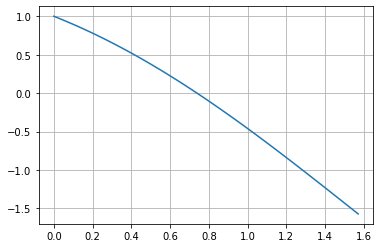

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(0,np.pi/2,100)
y=np.cos(x)-x
plt.plot(x,y)
plt.grid()

- **Solución (continuación)**: 
  - Como se ve en el gráfico, la raíz parece encontrarse cerca a 0.7, así que usaremos ese como nuesto valor de partida $p_0 = 0.7$. 

  - Para usar el método es necesario conocer la derivada de la función:

   $$
   f'(x) = - \sin x - 1 
   $$

  - La primera aproximación $p_1$ de la raíz se puede calcular y es igual a:

   $$
   p_1 = p_{0}-\frac{f\left(p_{0}\right)}{f'\left(p_{0}\right)} = p_{0}-\frac{\cos p_0 - p_0}{- \sin p_0 - 1 } = 0.7394364978
   $$

  - Uno de los criterios para verificar que tan cerca estamos de la solución es evaluar la función en el nuevo valor estimado de $p$:

   $$
   f(p_1) = \cos p_1 - p_1 = -0.000588
   $$
   que es un valor realmente pequeño.  En tan solo un paso ya el método de Newton nos entrega una aproximación muy razonable de la raíz.

  - Si repetimos el procedimiento obtenemos una segunda aproximación:

   $$
   p_2 = p_{1}-\frac{\cos p_1 - p_1}{- \sin p_1 - 1 } = 0.73908516
   $$

  - Una aproximación que tiene un valor de función $f(p_2)= -0.0000000456$.

### Algoritmo del método de Newton

- En la imagen a continuación se muestra el algoritmo del método de Newton:

- Una implementación en Python del método se muestra a continuación:

In [13]:
def metodo_newton_burden(f,fp,p0,TOL,N0):
  #Paso 1
  i=1
  #Paso 2
  while i<=N0:
      #Paso 3
      p = p0 - f(p0)/fp(p0)
      #Paso 4
      if abs(p-p0)<TOL:
        return i,p
      #Paso 5
      i = i + 1
      #Paso 6
      p0 = p
  print(f"El método fallo después de {N0} iteraciones con un último valor p = {p}")

- Nótese que hemos agregado al algoritmo original la funcionalidad de devolver no solo la raíz, sino también el número de iteraciones que fueron necesarias para conseguir la tolerancia solicitada.

- Aplicado a la función anterior daría:

In [15]:
def f(x):
  fx=np.cos(x)-x
  return fx

def fp(x):
  fpx=-np.sin(x)-1
  return fpx

metodo_newton_burden(f,fp,0.7,1e-5,100)

(3, 0.7390851332151608)

- Nótese que para usar el método de Newton es necesario proveer no solamente la función `f` sino también su derivada `fp`.

### Cálculo simbólico en Python

In [ ]:
x=np.linspace(-1,1,100)
y=(x**2-1)/3
y2=x

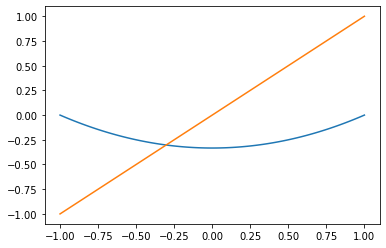

In [ ]:
plt.plot(x,y)
plt.plot(x,y2)
#plt.xlim(-0.5,-0.25)

- **Ejemplo 1**: Muestre que $g(x)=\left(x^{2}-1\right) / 3$ tiene un punto fijo único en el intervalo $[-1,1]$.

- **Solución**: 

  - Los valores máximo y mínimo de $g(x)$ para $x$ en $[-1,1]$ deben ocurrir ya sea cuando $x$ es un extremo del intervalo o cuando la derivada es 0 . 
  
  - Puesto que $g^{\prime}(x)=2 x / 3$, la función $g$ es continua y $g^{\prime}(x)$ existe en $[-1,1]$. 
  
  - Los valores máximo y mínimo de $g(x)$ se presentan en $x=-1, x=0$ o $x=1$. 
  
  - Pero $g(-1)=0, g(1)=0 y g(0)=-1 / 3$, por lo que un máximo absoluto para $g(x)$ en $[-1,1]$ se presenta en $x=-1$ y $x=1$ y un mínimo absoluto en $x=0$.

  - Además, $\left|g^{\prime}(x)\right|=\left|\frac{2 x}{3}\right| \leq \frac{2}{3}, \quad$ para todas las $x \in(-1,1)$.

  - De este modo $g$ satisface todas las hipótesis del **teorema de punto fijo** y tiene un punto fijo único en $[-1,1]$.

  - El único punto fijo $p$ en el intervalo $[-1,1]$ se puede determinar de manera algebraica. Si

   $$
  p=g(p)=\frac{p^{2}-1}{3}, \quad \text { entonces } \quad p^{2}-3 p-1=0
  $$
   lo cual, por la fórmula cuadrática, implica, como se muestra en la gráfica izquierda en la figura $2.4$, que
   $$
  p=\frac{1}{2}(3-\sqrt{13})
  $$

  - Observe que $g$ también tiene un punto fijo único $p=\frac{1}{2}(3+\sqrt{13})$ para el intervalo $[3,4]$. 
  
  - Sin embargo, $g(4)=5 y g^{\prime}(4)=\frac{8}{3}>1$, por lo que $g$ no satisface la hipótesis del **teorema de punto fijo** en $[3,4]$. 
  
  - Esto demuestra que la hipótesis del **teorema de punto fijo** es suficiente, pero no necesaria para garantizar la unicidad del punto fijo.

  - Hagamos un gráfico para ver más claramente estas cosas:

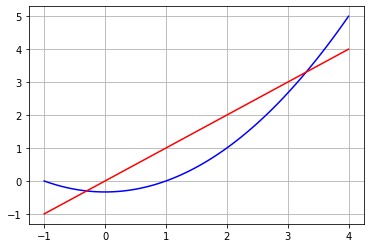

In [ ]:
import numpy as np
x=np.linspace(-1,4,100)
g=(x**2-1)/3

import matplotlib.pyplot as plt
plt.plot(x,g,color='b')
plt.plot(x,x,color='r')
plt.grid()

- **Ejemplo 2**: Muestre que el **teorema de punto fijo** no garantiza un punto fijo único de $g(x)=3^{-x}$ en el intervalo $[0,1]$, aunque existe un punto fijo único en este intervalo.


- **Solución**: 

  - Tenemos que $g^{\prime}(x)=-3^{-x} \ln 3<0$ en $[0,1]$, la función $g$ es estrictamente decreciente en $[0,1]$. 
  
  - Por lo que
    $$
  g(1)=\frac{1}{3} \leq g(x) \leq 1=g(0), \quad \text { para } \quad 0 \leq x \leq 1
  $$
  
  - Por lo tanto, para $x \in[0,1]$, tenemos $g(x) \in[0,1]$. La primera parte del **teorema de punto fijo** garantiza que existe por lo menos un punto fijo en $[0,1]$.

  - Sin embargo,
  $$
  g^{\prime}(0)=-\ln 3=-1.098612289
  $$
  por lo que $\left|g^{\prime}(x)\right| > 1$ en $(0,1)$, y el **teorema de punto fijo** no se puede usar para determinar la unicidad. Pero $g$ siempre decrece y es claro, a partir de la figura $2.5$, que el punto fijo debe ser único.


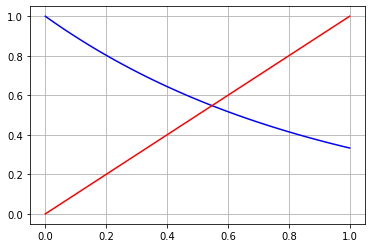

In [ ]:
import numpy as np
x=np.linspace(0,1,100)
g=3**(-x)

import matplotlib.pyplot as plt
plt.plot(x,g,color='b')
plt.plot(x,x,color='r')
plt.grid()

### Iteración de punto fijo

- En la sección de métodos numéricos básicos ya habíamos visto que la manera de encontrar un punto fijo de una función $g(x)$ es usar la ecuación de recurrencia:

  $$
  p_{n} = g(p_{n-1})
  $$

- El algoritmo en Python se muestra a continuación:

In [ ]:
def punto_fijo_burden(g,p0,TOL,N0):
  #Paso 1
  i=1
  #Paso 2
  while i<=N0:
    #Paso 3
    p = g(p0)
    #Paso 4
    if abs(p-p0)<TOL:
      return p
    #Paso 5
    i=i+1
    #Paso 6
    p0=p
  print(f"El método fallo después de {N0} pasos pero iba en p = {p}")

- Podemos aplicarlo para resolver el ejemplo 1:

In [ ]:
def g(x):
  gx=(x**2-1)/3
  return gx

punto_fijo_burden(g,0,1e-3,100)

-0.302828444201158

- Que podemos verificar con el gráfico:

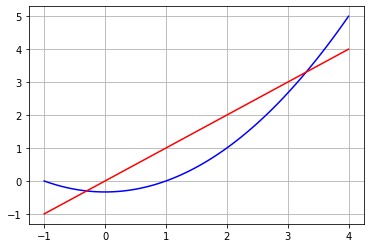

In [ ]:
import numpy as np
x=np.linspace(-1,4,100)

import matplotlib.pyplot as plt
plt.plot(x,g(x),color='b')
plt.plot(x,x,color='r')
plt.grid()

### Una gráfica del método de punto fijo

- Se puede hacer una gráfica del procedimiento de aproximación que realiza el método de punto fijo:

In [ ]:
def grafico_puntofijo(g,a,b,p0,N):
  #Arreglo
  x=[0]*(N+1)

  #Valor inicial
  x[0]=p0 

  #El algoritmo
  for i in range(N):
    x[i+1]=g(x[i])

  #Gráfico
  xs=np.linspace(a,b,100)
  y1s=xs
  y2s=g(xs)
  plt.plot(xs,y1s)
  plt.plot(xs,y2s)

  for i in range(N):
    #De la recta a la curva
    plt.plot([x[i],x[i]],[x[i],g(x[i])],'r-')
    #De la curva a la recta
    plt.plot([x[i],g(x[i])],[g(x[i]),g(x[i])],'r--')
  plt.grid()

  return x[-1]

- Así se aplica a este problema: encontrar el punto fijo de la función $g(x)=\exp(-x)$ en el intervalo $[0.3,0.6]$.

0.4263270313499304

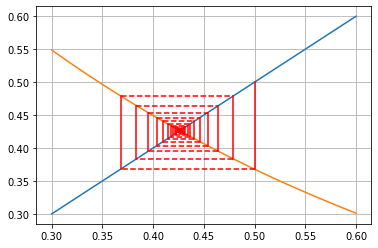

In [ ]:
def g(x):
  gx=np.exp(-2*x)
  return gx

grafico_puntofijo(g,0.3,0.6,0.5,50)

- Nóte lo que pasa si lo aplicamos a una función en la que la derivada es mayor que 1 en el intervalo seleccionado:

4.299816959999999

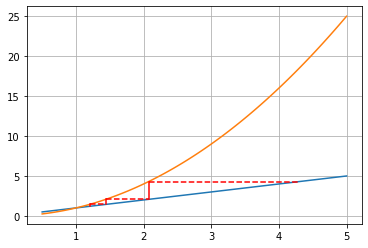

In [ ]:
def g(x):
  gx=x**2
  return gx

grafico_puntofijo(g,0.5,5,1.2,3)

## Continuará...

## Ejercicios

- Partiendo del resultado obtenido en clase para el ángulo y la ecuación:

   $$
   H=v \sin \theta T-\frac{g T^{2}}{2}+h
   $$

   encuentre el valor del tiempo $T$ que se demora la bola en volar desde las manos del tirador hasta el aro usando el método de bisección.  Haga una rutina que devuelva el valor de $d_n=|p_{n}-p_{n-1}|$ y haga un un gráfico de $d_n$ y de $M_n$. 

   **Ayuda**: para hacer un grafico de $M_n$ hasta $n=9$ se puede usar (después de haber escogido apropiadamente los valores de $a$ y $b$):

   ```python
   n=np.arange(0,10)
   Mn=(b-a)/2**n
   plt.plot(n,Mn)
   ```

-----
*Fin*